prepare the data
- load packages
- load the dataset
- take a bird's eye view of the dataset

In [9]:
import pandas as pd 
#the entire package 
#pandas is a software library written for the Python programming language for data manipulation and analysis.
#in particular, it offers data structures and operations for manipulating numerical tables and time series.
import numpy as np 
#the etire oackage 
#NumPy stands for Numerical Python, a python library used for working with arrays. 
#it also has functions for working in domain of linear algebra, fourier transform, and matrices.
from sklearn import datasets 
#get partial of the entire package 
#Scikit-learn, a machine learning library, a huge package
import statistics #to get the mean
import matplotlib.pyplot as plt
import seaborn as sns 
#since seaborn is an abstraction layer on top of matplotlib, we must import matplotlib every time if seaborn will be deployed
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [65]:
data = pd.read_csv("boston.csv") #ask pandas pacakge to exeucte reading csv file  

In [66]:
data #see if loading csv file is successful

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
data.isnull() #check for missing values #but what is missing values hidden???
data.isnull()["crim"].sum()

0

In [13]:
data.info() #check data type in case there is anythinng wrong with the data type for later feature engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
#variable "chas" is presented as 0 and 1, meaning no and yes. 
#thus, the data type should be "catergory" instead of being integer
## data.loc[:, "chas"] = data.loc[:, "chas"].astype("category")
#run the code above again; you will find the type of chas being changed from"int64" to "category"

In [15]:
data.columns 
#check if the actual data is as described in the webpage
#the csv file downlaoded has fewer columns than the what has been described in the webpage.

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [16]:
data.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


questions on the dataset 
- is the dataset big enough? 
  usually, as long as the dataset has more than 100 values/objects, it is a big enough dataset.
- is the dataset clean enough?/how to tell if this dataset clean?
  missing values???
- what do I need for the prediction? 
  Linear regression
- what should impact cmedv == the corrected median value of owner-occupied homes in USD 1000's? 
  test each variable by visualization

answers after validation
- what should impact the corrected median value of owner-occupied homes in USD 1000's? 
  crim,rm,dis(<4),lstat,zn(>10),chas,ptratio,indus,nox, 9 out of 13

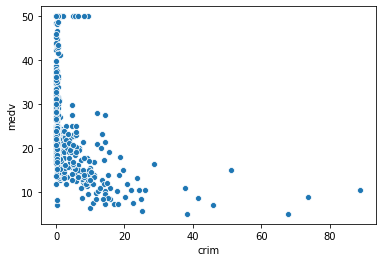

In [17]:
#seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, 
                    #palette=None, hue_order=None, hue_norm=None, sizes=None, 
                    #size_order=None, size_norm=None, markers=True, style_order=None, 
                    #x_bins=None, y_bins=None, units=None, estimator=None, ci=95, 
                    #n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, 
                    #legend='brief', ax=None, **kwargs)
            
sns.scatterplot(x=data.loc[:,"crim"], y=data.loc[:,"medv"]) 
#crim == per capita crime rate by town
#a pattern can been seen 

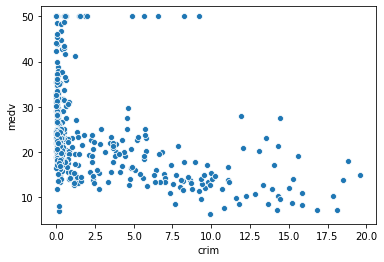

In [18]:
sns.scatterplot(x=data.loc[data.crim <= 20,"crim"], y=data.loc[:,"medv"])
#zoom in to have a better judgement

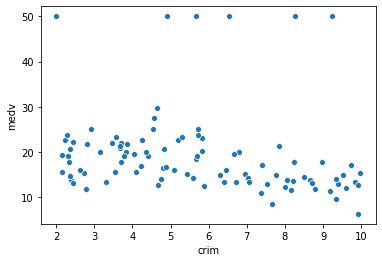

In [19]:
sns.scatterplot(x=data.loc[(data.crim >= 2) & (data.crim <= 10),"crim"], y=data.loc[:,"medv"])

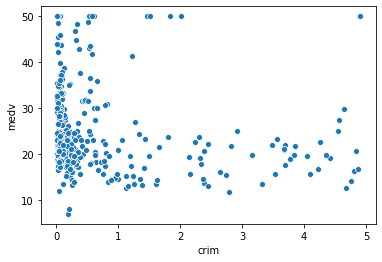

In [20]:
sns.scatterplot(x=data.loc[data.crim <= 5,"crim"], y=data.loc[:,"medv"])
#zoom in to have a better judgement

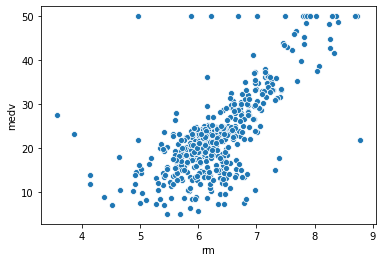

In [21]:
sns.scatterplot(x=data.loc[:,"rm"], y=data.loc[:,"medv"]) 
#rm == average number of rooms per dwelling
#a clear pattern

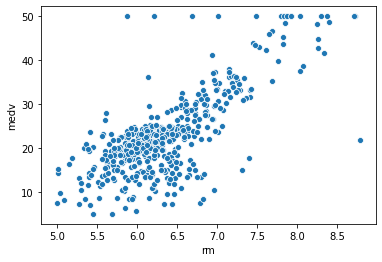

In [22]:
sns.scatterplot(x=data.loc[data.rm >= 5,"rm"], y=data.loc[:,"medv"])
#there is an obvious almost linear pattern 

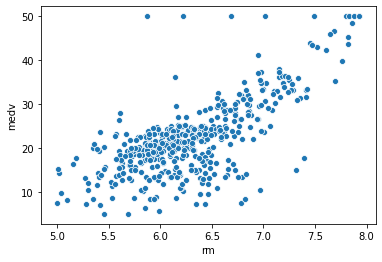

In [23]:
sns.scatterplot(x=data.loc[(data.rm >= 5) & (data.rm <= 8),"rm"], y=data.loc[:,"medv"])

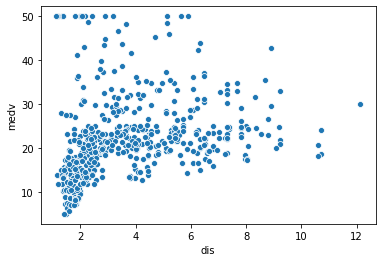

In [24]:
sns.scatterplot(x=data.loc[:,"dis"], y=data.loc[:,"medv"]) 
#dis == weighted distances to five Boston employment centres
#has a steeper pattern when dis <= 4

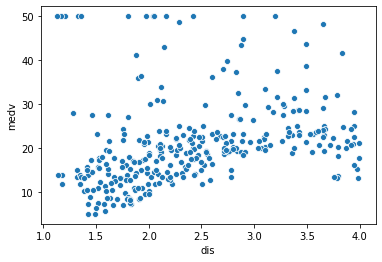

In [25]:
sns.scatterplot(x=data.loc[data.dis <= 4,"dis"], y=data.loc[:,"medv"])

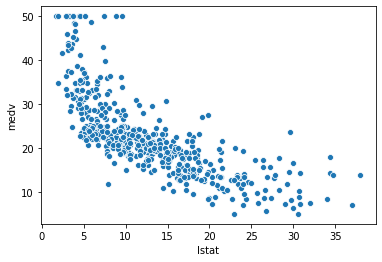

In [26]:
sns.scatterplot(x=data.loc[:,"lstat"], y=data.loc[:,"medv"]) # test 
#such an obvious pattern, could be the most impactful variable
#lstat == percentage of lower status of the population

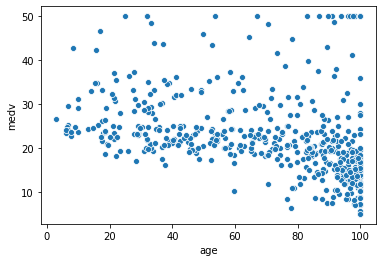

In [27]:
sns.scatterplot(x=data.loc[:,"age"], y=data.loc[:,"medv"]) 
#test 
#age == proportion of owner-occupied units built prior to 1940
#not significant impact

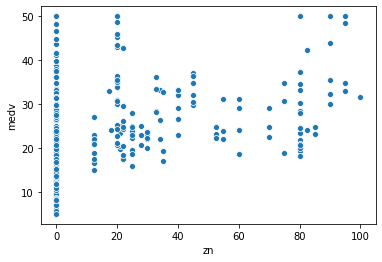

In [28]:
sns.scatterplot(x=data.loc[:,"zn"], y=data.loc[:,"medv"]) 
#zn == proportion of residential land zoned for lots over 25,000 sq.ft

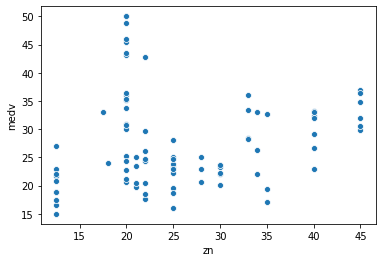

In [29]:
sns.scatterplot(x=data.loc[(data.zn >= 10) & (data.zn <= 50),"zn"], y=data.loc[:,"medv"])

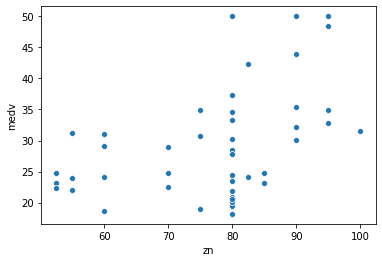

In [30]:
sns.scatterplot(x=data.loc[data.zn>50,"zn"],y=data.loc[:,"medv"])

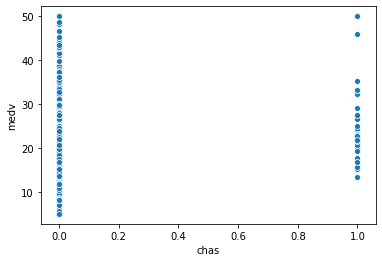

In [31]:
sns.scatterplot(x=data.loc[:,"chas"], y=data.loc[:,"medv"]) 
#chas == Charles River dummy variable

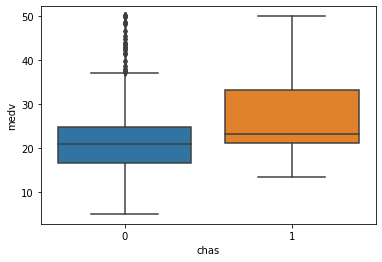

In [32]:
sns.boxplot(x=data.loc[:,"chas"], y=data.loc[:,"medv"])
#when chas == 1, medv is higher in general

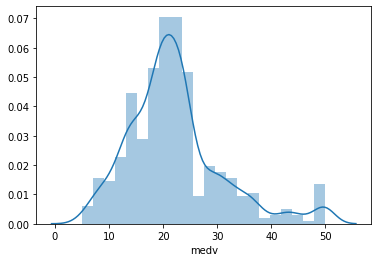

In [33]:
sns.distplot(data.loc[data.chas == 0, "medv"])

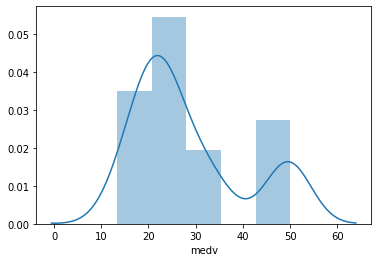

In [34]:
sns.distplot(data.loc[data.chas == 1, 'medv'])

no. vs no. = scatterplot
no. vs category = boxplot

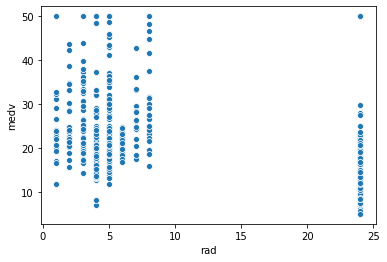

In [35]:
sns.scatterplot(x=data.loc[:,"rad"], y=data.loc[:,"medv"]) # test
#rad == index of accessibility to radial highways
#when "rad" is 24, the "medv" is lower. maybe impactful, maybe NOT.

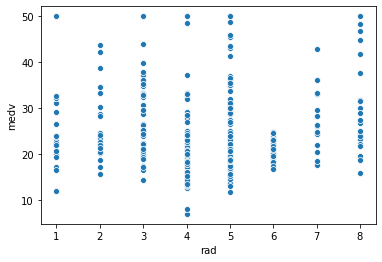

In [36]:
sns.scatterplot(x=data.loc[data.rad <= 10,"rad"], y=data.loc[:,"medv"])
#NOT make much difference, forget it 

In [37]:
print(data.loc[data.rad >= 8, :])

        crim    zn  indus chas    nox     rm   age     dis  rad  tax  ptratio  \
58   0.15445  25.0   5.13    0  0.453  6.145  29.2  7.8148    8  284     19.7   
59   0.10328  25.0   5.13    0  0.453  5.927  47.2  6.9320    8  284     19.7   
60   0.14932  25.0   5.13    0  0.453  5.741  66.2  7.2254    8  284     19.7   
61   0.17171  25.0   5.13    0  0.453  5.966  93.4  6.8185    8  284     19.7   
62   0.11027  25.0   5.13    0  0.453  6.456  67.8  7.2255    8  284     19.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...  ...      ...   
483  2.81838   0.0  18.10    0  0.532  5.762  40.3  4.0983   24  666     20.2   
484  2.37857   0.0  18.10    0  0.583  5.871  41.9  3.7240   24  666     20.2   
485  3.67367   0.0  18.10    0  0.583  6.312  51.9  3.9917   24  666     20.2   
486  5.69175   0.0  18.10    0  0.583  6.114  79.8  3.5459   24  666     20.2   
487  4.83567   0.0  18.10    0  0.583  5.905  53.2  3.1523   24  666     20.2   

          b  lstat  medv  


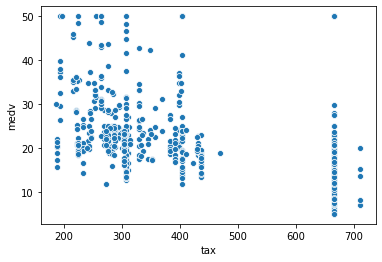

In [38]:
sns.scatterplot(x=data.loc[:,"tax"], y=data.loc[:,"medv"]) 
#tax == full-value property-tax rate per USD 10,000 
#when tax is around 680 and around 720, medv is lower.

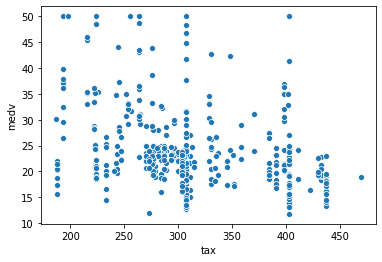

In [39]:
sns.scatterplot(x=data.loc[(data.tax>150)&(data.tax<500),"tax"],y=data.loc[:,"medv"])
#when tax is bwtween 150 and 400, not much difference
#in general, not much difference, like rad

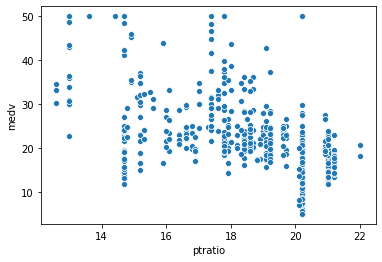

In [40]:
sns.scatterplot(x=data.loc[:,"ptratio"], y=data.loc[:,"medv"]) 
#ptratio == pupil-teacher ratio by town
#when ptratio is smaller than 14, medv is higher
#when ptratio is from 15 to 18, medv has an increasing tendency
#when ptratio is betwwen 18 and 19, not much difference seen in medv
#when ptratio is graeter than 20, medv is lower

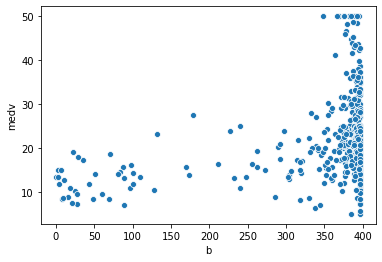

In [41]:
sns.scatterplot(x=data.loc[:,"b"], y=data.loc[:,"medv"]) 
#b == 1000(B−0.63)^2 where B is the proportion of blacks by town 

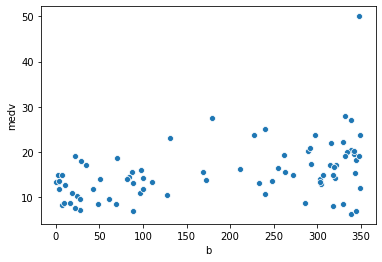

In [42]:
sns.scatterplot(x=data.loc[data.b<350, "b"], y=data.loc[:,"medv"])
#when b is smaller than 350, not much variance is seen, medv ranging from 0 to 30
#in general, not much difference

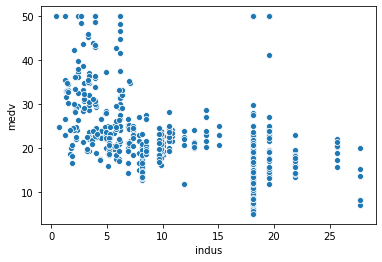

In [43]:
sns.scatterplot(x=data.loc[:,"indus"], y=data.loc[:,"medv"]) 
#indus == proportion of non-retail business acres per town

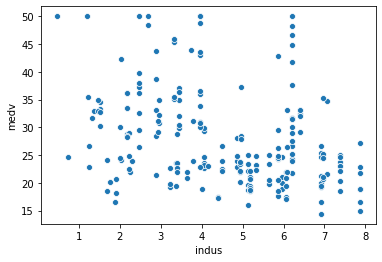

In [44]:
sns.scatterplot(x=data.loc[data.indus<8, "indus"], y=data.loc[:,"medv"])
#when indus is smaller than 8, medv starts around 15 and reaches to 50

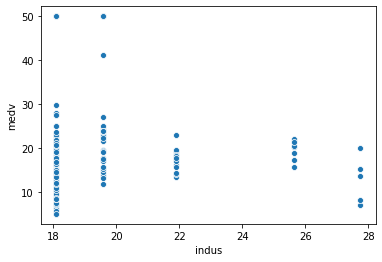

In [45]:
sns.scatterplot(x=data.loc[data.indus>18, "indus"], y=data.loc[:,"medv"])

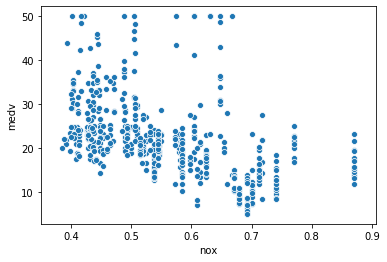

In [46]:
sns.scatterplot(x=data.loc[:,"nox"], y=data.loc[:,"medv"]) 
#nox == nitric oxides concentration (parts per 10 million)

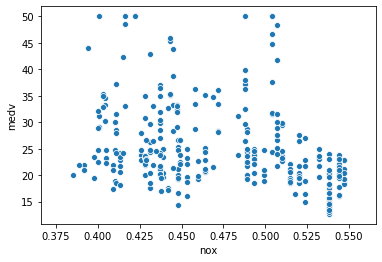

In [47]:
sns.scatterplot(x=data.loc[data.nox<0.55, "nox"], y=data.loc[:,"medv"])
#when nox is smaller than 0.55, medv is higher

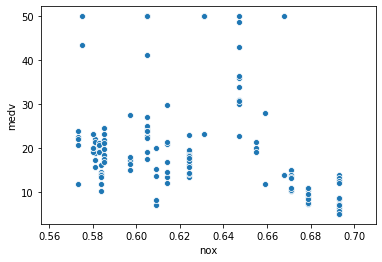

In [48]:
sns.scatterplot(x=data.loc[(data.nox>0.55)&(data.nox<0.7), "nox"], y=data.loc[:,"medv"])

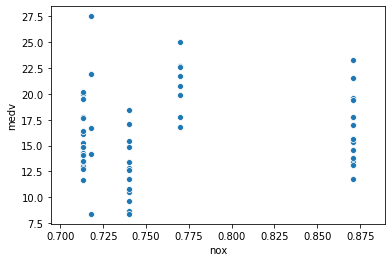

In [49]:
sns.scatterplot(x=data.loc[data.nox>0.7, "nox"], y=data.loc[:,"medv"])

- What is feature flag in DevOps?
  A feature flag is also known as a feature toggle, feature switch, feature flipper, or conditional feature. Feature flags support a customer-first DevOps mindset, to enable (expose) and disable (hide) features in a solution, even before they are complete and ready for release

- What is feature toggle used for?
  Feature toggles, also known as feature flags, are components of software development that allow specific features of an application to be activated or deactivated at will. This allows developers to safely “toggle” new features on or off for testing.

In [50]:
#what features should we flag???

data.loc[:, "low_crim"] = 0
for row in range(0, len(data)):
    if data.loc[:,"crim"][row] <= 1: 
        data.loc[:, "low_crim"][row] =1

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
data.loc[:, "high_crim"] = 0
for row in range(0, len(data)):
    if data.loc[:,"crim"][row] >= 30:
        data.loc[:,"high_crim"][row] = 1

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,low_crim,high_crim
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1,0


In [53]:
#to make the data as disperse as possible, shuffle the data
data_shuffled = data.sample(frac=1, random_state = 1104)
#to not confuse the machine which may lead to errors in certain functions, reset the index 
data_shuffled.reset_index (inplace = True, drop = True)

In [54]:
#model 1, LinearRegression
#model = LinearRegression()
#model.fit(x_train, y_train) 
#model.score(x_test, y_test) 

NameError: name 'x_train' is not defined

In [67]:
#model 2, statsmodel
#split the dataset into 80:20
data_train=data.loc[0:405, :]
data_test=data.loc[405:,:]

In [71]:
#do we need ALL variables???
x_train = data_train.loc[:,["crim", "zn", "indus", "chas", "nox", "rm", "age", 
                            "dis", "rad", "tax","ptratio", "b", "lstat"] ] #"low_crim", "high_crim"
y_train = data_train.loc[:,"medv"]

In [70]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 15 columns):
crim         406 non-null float64
zn           406 non-null float64
indus        406 non-null float64
chas         406 non-null int64
nox          406 non-null float64
rm           406 non-null float64
age          406 non-null float64
dis          406 non-null float64
rad          406 non-null int64
tax          406 non-null int64
ptratio      406 non-null float64
b            406 non-null float64
lstat        406 non-null float64
low_crim     0 non-null float64
high_crim    0 non-null float64
dtypes: float64(12), int64(3)
memory usage: 47.7 KB


In [72]:
#why do we use OLS? the classic linear regression
model = sm.OLS(endog=y_train, exog=x_train)

In [73]:
#
results = model.fit()

In [60]:
results.tvalues

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


crim         -4.126090
zn            3.058238
indus         0.344020
chas          2.075460
nox          -0.610315
rm           15.781946
age          -0.327412
dis          -4.529995
rad           3.557623
tax          -2.862343
ptratio      -3.222132
b             1.928329
lstat        -7.718336
low_crim     -0.785862
high_crim          NaN
dtype: float64

In [62]:
results.f_pvalue

8.76365218171883e-273

In [63]:
results.t_test(x_train)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            28.8746      0.726     39.759      0.000      27.447      30.302
c1            24.6074      0.553     44.478      0.000      23.520      25.695
c2            31.7876      0.565     56.229      0.000      30.676      32.899
c3            30.3168      0.667     45.438      0.000      29.005      31.629
c4            30.1414      0.650     46.374      0.000      28.864      31.419
c5            25.6360      0.663     38.671      0.000      24.333      26.939
c6            21.5598      0.645     33.440      0.000      20.292      22.827
c7            18.9920      0.936     20.299      0.000      17.153      20.831
c8            10.3736      1.252      8.283      0.000       7.911      12.836

In [74]:
results.pvalues #significance

crim       1.392261e-05
zn         2.078955e-03
indus      6.237882e-01
chas       3.668349e-02
nox        6.661595e-01
rm         1.616100e-44
age        7.763940e-01
dis        7.918305e-06
rad        9.122372e-05
tax        5.578193e-03
ptratio    4.220527e-04
b          7.690669e-02
lstat      6.121457e-14
dtype: float64

In [75]:
values_list = list(results.pvalues)

In [76]:
for i in values_list:
    print("Number is: %.8f"%(float(i)))
    

Number is: 0.00001392
Number is: 0.00207895
Number is: 0.62378819
Number is: 0.03668349
Number is: 0.66615948
Number is: 0.00000000
Number is: 0.77639403
Number is: 0.00000792
Number is: 0.00009122
Number is: 0.00557819
Number is: 0.00042205
Number is: 0.07690669
Number is: 0.00000000


In [77]:
results.params #effect size/weights/coEfficient 

crim      -0.203171
zn         0.045347
indus      0.033296
chas       1.933595
nox       -1.644609
rm         6.230020
age       -0.004196
dis       -0.928684
rad        0.340490
tax       -0.012741
ptratio   -0.431509
b          0.010940
lstat     -0.460453
dtype: float64

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              807.6
Date:                Wed, 19 Aug 2020   Prob (F-statistic):                   4.11e-274
Time:                        11:56:26   Log-Likelihood:                         -1221.8
No. Observations:                 406   AIC:                                      2470.
Df Residuals:                     393   BIC:                                      2522.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2032      0.046     -4.401      0.000      -0.294      -0.112
zn             0.0453      0.015      3.099      0.002       0.017       0.074
indus          0.0333      0.068      0.491      0.624      -0.100       0.167
chas           1.9336      0.922      2.096      0.037       0.120       3.747
nox           -1.6446      3.809     -0.432      0.666      -9.133       5.844
rm             6.2300      0.391     15.950      0.000       5.462       6.998
age           -0.0042      0.015     -0.284      0.776      -0.033       0.025
dis           -0.9287      0.205     -4.528      0.000      -1.332      -0.525
rad            0.3405      0.086      3.954      0.000       0.171       0.510
tax           -0.0127      0.005     -2.787      0.006      -0.022      -0.004
ptratio       -0.4315      0.121     -3.556      0.000      -0.670      -0.193
b              0.0109      0.006      1.774      0.077      -0.001       0.023
lstat         -0.4605      0.059     -7.788      0.000      -0.577      -0.344
==============================================================================
Omnibus:                      142.442   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1015.582
Skew:                           1.302   Prob(JB):                    2.95e-221
Kurtosis:                      10.298   Cond. No.                     8.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""